<a href="https://colab.research.google.com/github/aditya161989/EIP4.0/blob/master/1st_DNN_Aditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


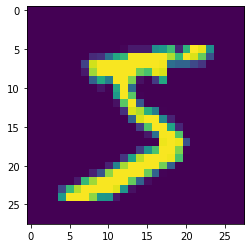

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [170]:
from keras.layers import Activation, MaxPooling2D
model = Sequential()

model.add(Convolution2D(8,3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16,3, 3, activation='relu')) 
model.add(MaxPooling2D())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D())
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(3,3, activation='relu', input_shape=(20,20,10)))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [171]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_176 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 4, 4, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [173]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2301 - acc: 0.9286 - val_loss: 0.0729 - val_acc: 0.9776
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0764 - acc: 0.9762 - val_loss: 0.0504 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0575 - acc: 0.9823 - val_loss: 0.0446 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0376 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0397 - acc: 0.9876 - val_loss: 0.0387 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0302 - acc: 0.9906 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [175]:
print(score)

[0.029451306480511266, 0.9908]


In [0]:
y_pred = model.predict(X_test)

In [177]:
print(y_pred[:9])
print(y_test[:9])

[[8.64617059e-11 2.57120747e-09 7.31292175e-07 8.91411176e-08
  1.67799422e-12 7.38238290e-11 7.65339194e-19 9.99998569e-01
  1.26692834e-08 6.38784854e-07]
 [4.34656113e-06 7.29737621e-07 9.99984860e-01 2.36373765e-09
  5.77281972e-11 2.94607290e-11 9.79075594e-06 6.21554221e-08
  1.50371449e-07 2.72457317e-15]
 [8.64848104e-08 9.99833107e-01 1.92200387e-05 3.27627370e-09
  7.79656111e-05 1.15651721e-06 4.07122434e-06 5.57758576e-05
  6.86457588e-06 1.69273244e-06]
 [9.99927521e-01 9.08294978e-13 1.14906173e-09 1.52469877e-11
  1.57981744e-12 1.66414491e-08 7.24587808e-05 5.05676390e-09
  1.88424076e-09 1.15896881e-09]
 [1.42942924e-09 1.09762144e-09 8.06132849e-09 4.91919049e-12
  9.99804556e-01 1.61948215e-11 6.32821406e-10 8.38986036e-09
  1.86816536e-08 1.95491026e-04]
 [7.67770061e-08 9.99952197e-01 1.62427241e-05 4.82328760e-11
  1.10020383e-05 5.66793146e-09 6.15521060e-07 1.73801254e-05
  1.97727468e-06 5.05524497e-07]
 [2.57167475e-17 1.38789169e-09 8.62712179e-10 1.08026149e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [179]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored